#**Exercícios - Aula 1**

## 1) Dado o dataset de produtos [1]:

[1] - https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv

In [1]:
import pandas as pd

df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv",
    delimiter=";",
    encoding='utf-8' )

In [2]:
df.head()

,nome,descricao,categoria
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro


#### 1.1. Analise o % de valores nulos no dataset

In [3]:
df.describe()

,nome,descricao,categoria
count,4080,2916,4080
unique,3696,2460,4
top,Mais Escuro - Cinquenta Tons Mais Escuros Pel...,JOGO ORIGINAL. NOVO. LACRADO. PRONTA ENTREGA. ...,livro
freq,20,39,1020


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       4080 non-null   object
 1   descricao  2916 non-null   object
 2   categoria  4080 non-null   object
dtypes: object(3)
memory usage: 95.8+ KB


In [5]:
df.count()

,0
nome,4080
descricao,2916
categoria,4080


In [6]:
# dimensão do dataframe
df.shape[0]

4080

In [7]:
print(df.shape[0], df.shape[1])

4080 3


In [8]:
# conta valores faltantes/nulos/missing
df.isnull().sum()

,0
nome,0
descricao,1164
categoria,0


In [9]:
# calcula o % de nulos no dataset
df.isnull().sum()/df.shape[0]

,0
nome,0.000000
descricao,0.285294
categoria,0.000000


#### 1.2. Remova os registros/linhas com valores nulos, se houver

In [10]:
# dropna(inplace=True), inplace=True => modifica o próprio objeto. dropna(inplace=False), inplace=False => retorma uma cópia do objeto
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2916 entries, 0 to 4079
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       2916 non-null   object
 1   descricao  2916 non-null   object
 2   categoria  2916 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB


In [11]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2916 entries, 0 to 4079
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       2916 non-null   object
 1   descricao  2916 non-null   object
 2   categoria  2916 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB


#### 1.3. Analise a distribuição das “categorias”

In [12]:
df.categoria

,categoria
0,livro
1,livro
2,livro
3,livro
4,livro
...,...
4073,game
4074,game
4075,game
4078,game


In [13]:
df.categoria.value_counts()

,count
categoria,
livro,838
maquiagem,788
brinquedo,668
game,622


In [14]:
(df.categoria.value_counts()/df.shape[0])*100
# df.categoria.value_counts()/df.categoria.count() # outra forma

,count
categoria,
livro,28.737997
maquiagem,27.023320
brinquedo,22.908093
game,21.330590


<Axes: xlabel='categoria'>

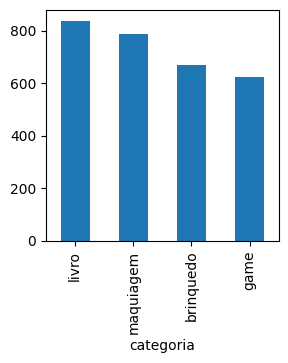

In [15]:
df.categoria.value_counts().plot(kind='bar', figsize=(3,3))

<Axes: xlabel='categoria'>

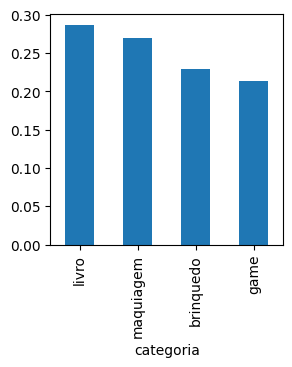

In [16]:
(df.categoria.value_counts()/df.shape[0]).plot(kind='bar', figsize=(3,3))

#### 1.4 Crie uma nova coluna chamada "texto“, concatenando as colunas "nome" e "descricao"


In [17]:
# Exemplo de concateção de informações
print("Texto 1" + " " + "Texto 2")

Texto 1 Texto 2


In [18]:
df["texto"] = df['nome'] + " " + df['descricao'] # cria uma nova culuna com os valores concatenados
df.texto[0]

' O Hobbit - 7ª Ed. 2013  Produto NovoBilbo Bolseiro é um hobbit que leva uma vida confortável e sem ambições. Mas seu contentamento é perturbado quando Gandalf, o mago, e uma companhia de anões batem à sua porta e levam-no para uma expedição. Eles têm um plano para roubar o tesouro guardado por Smaug, o Magnífico, um grande e perigoso dragão. Bilbo reluta muito em participar da aventura, mas acaba surpreendendo até a si mesmo com sua esperteza e sua habilidade como ladrão!CaracterísticasAutor: Tolkien, J. R. R.Peso: 0.44I.S.B.N.: 9788578277109Altura: 20.000000Largura: 13.000000Profundidade: 1.000000Número de Páginas: 328Idioma: PortuguêsAcabamento: BrochuraNúmero da edição: 7Ano da edição: 2013'

In [19]:
df.head()

,nome,descricao,categoria,texto
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro,O Hobbit - 7ª Ed. 2013 Produto NovoBilbo Bol...
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro,Livro - It A Coisa - Stephen King Produto No...
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro,Box As Crônicas De Gelo E Fogo Pocket 5 Li...
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro,Box Harry Potter Produto Novo e Físico A sé...
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro,Livro Origem - Dan Brown Produto NovoDe Onde...


#### 1.5 Descubra as 10 palavras que mais ocorrem nessa nova coluna “texto”

In [20]:
from collections import Counter
counter = Counter()

counter.update('a')
counter.update('b')
print(counter)

counter['a'] += 1
print(counter)
counter.most_common(10)

Counter({'a': 1, 'b': 1})
Counter({'a': 2, 'b': 1})


[('a', 2), ('b', 1)]

In [21]:
"você, sabia?".split()

['você,', 'sabia?']

In [22]:
df.texto.str.split() # default do split é o <espaço> como separador
#df.dtypes

,texto
0,"[O, Hobbit, -, 7ª, Ed., 2013, Produto, NovoBil..."
1,"[Livro, -, It, A, Coisa, -, Stephen, King, Pro..."
2,"[Box, As, Crônicas, De, Gelo, E, Fogo, Pocket,..."
3,"[Box, Harry, Potter, Produto, Novo, e, Físico,..."
4,"[Livro, Origem, -, Dan, Brown, Produto, NovoDe..."
...,...
4073,"[Red, Dead, Redemption, Edição, Do, Ano, Goty,..."
4074,"[Jogo, Gta, 5, Grand, Theft, Auto, V, Ps4, Míd..."
4075,"[Zelda:, Breath, Of, The, Wild, -, Expansion, ..."
4078,"[Gta, San, Andreas, Hd, Remastered, Ps3, Envio..."


In [23]:
df.texto.str.lower().str.split() # default do split é o <espaço> como separador
#df.dtypes

,texto
0,"[o, hobbit, -, 7ª, ed., 2013, produto, novobil..."
1,"[livro, -, it, a, coisa, -, stephen, king, pro..."
2,"[box, as, crônicas, de, gelo, e, fogo, pocket,..."
3,"[box, harry, potter, produto, novo, e, físico,..."
4,"[livro, origem, -, dan, brown, produto, novode..."
...,...
4073,"[red, dead, redemption, edição, do, ano, goty,..."
4074,"[jogo, gta, 5, grand, theft, auto, v, ps4, míd..."
4075,"[zelda:, breath, of, the, wild, -, expansion, ..."
4078,"[gta, san, andreas, hd, remastered, ps3, envio..."


In [24]:
df.texto.str.lower().str.split(" ") # tranforma a descrição em minúsculas e depois separa as pelavras pelo <espaço> e retorna no formato de lista

,texto
0,"[, o, hobbit, -, 7ª, ed., 2013, , produto, nov..."
1,"[, livro, -, it, a, coisa, -, stephen, king, ,..."
2,"[, box, , as, crônicas, de, gelo, e, fogo, , p..."
3,"[, box, harry, potter, , produto, novo, e, fís..."
4,"[, livro, origem, -, dan, brown, , produto, no..."
...,...
4073,"[, red, dead, redemption, edição, do, ano, got..."
4074,"[, jogo, gta, 5, grand, theft, auto, v, ps4, m..."
4075,"[, zelda:, breath, of, the, wild, -, expansion..."
4078,"[, gta, san, andreas, hd, remastered, ps3, env..."


In [25]:
from collections import Counter # implementa um container de tipo de dados. Ex: dict, list, set, and tuple

c = Counter() # subclasse dict para contar objetos

In [26]:
df.texto.str.lower().str.split().apply(c.update) # implementa a contagem

c.most_common(10)

[('de', 24300),
 ('e', 16042),
 ('o', 12424),
 ('a', 12152),
 ('do', 8791),
 ('para', 8032),
 ('-', 7413),
 ('em', 6900),
 ('que', 6797),
 ('com', 6247)]

In [27]:
# Outra forma de implementar
from collections import Counter

palavras = ' '.join(df['texto'].str.lower()).split()

contagem_palavras = Counter(palavras)
contagem_palavras.most_common(10)

[('de', 24300),
 ('e', 16042),
 ('o', 12424),
 ('a', 12152),
 ('do', 8791),
 ('para', 8032),
 ('-', 7413),
 ('em', 6900),
 ('que', 6797),
 ('com', 6247)]

#### **Bônus!** Monte uma nuvem de palavras

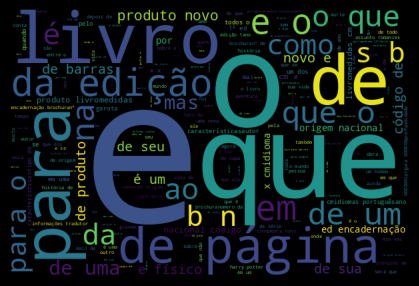

In [28]:
import matplotlib.pyplot as plt

try:
  from wordcloud import WordCloud
except:
  !pip install wordcloud
  from wordcloud import WordCloud

livro_words = ''
livro = df[df.categoria == 'livro'] # filtrei a categoria livro apenas como exemplo rápido para a demostração

# reune todas as plalavras em um único objeto, veja.
for val in livro.texto:
  text = val.lower()
  for words in text:
    livro_words = livro_words + words
    # todas as palavras das descrições da categoria livro no mesmo objeto: livro_words. As palavras são inseridas letra por letra

# Gera uma imagem da nuvem de palavras (Generate a word cloud image)
livro_wordcloud = WordCloud(width=600, height=400).generate(livro_words)

# Word cloud da categoria Livro
plt.figure( figsize=(4,4), facecolor='k')
plt.imshow(livro_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0) # Preenchimento entre a borda e a figura
plt.show()

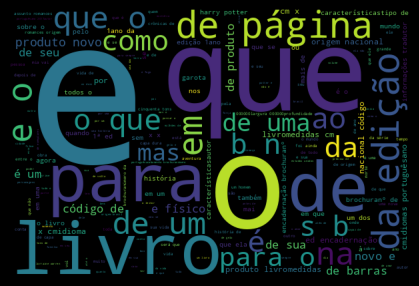

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# filtrei a categoria livro apenas como exemplo rápido para a demostração e termos um resultado diferente da contagem
livro_words = ' '.join(df[df.categoria == 'livro'].texto.str.lower())

# Gera uma imagem da nuvem de palavras (Generate a word cloud image)
livro_wordcloud = WordCloud(width=600, height=400).generate(livro_words)

# Word cloud da categoria Livro
plt.figure( figsize=(4,4), facecolor='k')
plt.imshow(livro_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0) # Preenchimento entre a borda e a figura
plt.show()